## Exploratory Data  Analysis 

#### Importing packages 

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading data

In [24]:
df_hrm = pd.read_csv("one_min_resampled_hrm_data.csv")
df_calories = pd.read_csv("one_min_resampled_stepcount_data.csv")

In [25]:
df_hrm.head(10)

,measuredAt,measurement
0,2022-10-01 05:41:00,82.0
1,2022-10-01 05:42:00,77.0
2,2022-10-01 05:43:00,89.0
3,2022-10-01 05:44:00,77.0
4,2022-10-01 05:45:00,87.0
5,2022-10-01 05:46:00,77.0
6,2022-10-01 05:47:00,88.0
7,2022-10-01 05:48:00,77.0
8,2022-10-01 05:49:00,82.0
9,2022-10-01 05:50:00,77.0


In [26]:
df_hrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42859 entries, 0 to 42858
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   measuredAt   42859 non-null  object 
 1   measurement  42859 non-null  float64
dtypes: float64(1), object(1)
memory usage: 669.8+ KB


In [27]:
df_hrm.describe()

,measurement
count,42859.000000
mean,78.249456
std,7.448091
min,30.000000
25%,77.000000
50%,77.000000
75%,77.000000
max,200.000000


In [28]:
df_hrm["date_time"] = pd.to_datetime(df_hrm["measuredAt"])

In [29]:
df_hrm.dtypes

measuredAt             object
measurement           float64
date_time      datetime64[ns]
dtype: object

In [30]:
df_calories.head(10)

,measuredAt,count,Calories
0,10/1/2022 5:40,35,1.365
1,10/1/2022 5:41,42,1.638
2,10/1/2022 5:42,10,0.390
3,10/1/2022 5:43,41,1.599
4,10/1/2022 5:44,10,0.390
5,10/1/2022 5:45,10,0.390
6,10/1/2022 5:46,10,0.390
7,10/1/2022 5:47,15,0.585
8,10/1/2022 5:48,10,0.390
9,10/1/2022 5:49,10,0.390


In [31]:
df_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   measuredAt  42536 non-null  object 
 1   count       42536 non-null  int64  
 2   Calories    42536 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 997.1+ KB


In [32]:
df_calories.describe()

,count,Calories
count,42536.000000,42536.000000
mean,12.093850,0.471660
std,10.047312,0.391845
min,1.000000,0.039000
25%,10.000000,0.390000
50%,10.000000,0.390000
75%,10.000000,0.390000
max,251.000000,9.789000


In [33]:
df_calories["date_time"] = pd.to_datetime(df_calories["measuredAt"])

In [34]:
df_calories.dtypes

measuredAt            object
count                  int64
Calories             float64
date_time     datetime64[ns]
dtype: object

#### Combining Heart rate & Calories Used data

In [35]:
df_combined = pd.merge(df_hrm,df_calories,on="date_time")

In [36]:
df_combined.head(10)

,measuredAt_x,measurement,date_time,measuredAt_y,count,Calories
0,2022-10-01 05:41:00,82.0,2022-10-01 05:41:00,10/1/2022 5:41,42,1.638
1,2022-10-01 05:42:00,77.0,2022-10-01 05:42:00,10/1/2022 5:42,10,0.390
2,2022-10-01 05:43:00,89.0,2022-10-01 05:43:00,10/1/2022 5:43,41,1.599
3,2022-10-01 05:44:00,77.0,2022-10-01 05:44:00,10/1/2022 5:44,10,0.390
4,2022-10-01 05:45:00,87.0,2022-10-01 05:45:00,10/1/2022 5:45,10,0.390
5,2022-10-01 05:46:00,77.0,2022-10-01 05:46:00,10/1/2022 5:46,10,0.390
6,2022-10-01 05:47:00,88.0,2022-10-01 05:47:00,10/1/2022 5:47,15,0.585
7,2022-10-01 05:48:00,77.0,2022-10-01 05:48:00,10/1/2022 5:48,10,0.390
8,2022-10-01 05:49:00,82.0,2022-10-01 05:49:00,10/1/2022 5:49,10,0.390
9,2022-10-01 05:50:00,77.0,2022-10-01 05:50:00,10/1/2022 5:50,10,0.390


In [37]:
df_combined.columns

Index(['measuredAt_x', 'measurement', 'date_time', 'measuredAt_y', 'count',
       'Calories'],
      dtype='object')

In [38]:
df = df_combined[['date_time','measurement','Calories']]

In [39]:
df = df.rename(columns={'measurement':"HRM_value",'Calories':"Calories_used"})

In [40]:
df.head(10)

,date_time,HRM_value,Calories_used
0,2022-10-01 05:41:00,82.0,1.638
1,2022-10-01 05:42:00,77.0,0.390
2,2022-10-01 05:43:00,89.0,1.599
3,2022-10-01 05:44:00,77.0,0.390
4,2022-10-01 05:45:00,87.0,0.390
5,2022-10-01 05:46:00,77.0,0.390
6,2022-10-01 05:47:00,88.0,0.585
7,2022-10-01 05:48:00,77.0,0.390
8,2022-10-01 05:49:00,82.0,0.390
9,2022-10-01 05:50:00,77.0,0.390


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 0 to 42534
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date_time      42535 non-null  datetime64[ns]
 1   HRM_value      42535 non-null  float64       
 2   Calories_used  42535 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 MB


In [42]:
df.describe()

,HRM_value,Calories_used
count,42535.000000,42535.000000
mean,78.287562,0.471639
std,7.445861,0.391826
min,30.000000,0.039000
25%,77.000000,0.390000
50%,77.000000,0.390000
75%,77.000000,0.390000
max,200.000000,9.789000


In [43]:
df.isna().sum()

date_time        0
HRM_value        0
Calories_used    0
dtype: int64

In [44]:
df.isnull().sum()

date_time        0
HRM_value        0
Calories_used    0
dtype: int64

In [45]:
df.iloc[2835]

date_time        2022-10-03 04:56:00
HRM_value                         77
Calories_used                   0.39
Name: 2835, dtype: object

In [46]:
df.tail(10)

,date_time,HRM_value,Calories_used
42525,2022-10-30 18:26:00,80.0,0.390
42526,2022-10-30 18:27:00,77.0,0.390
42527,2022-10-30 18:28:00,80.0,0.390
42528,2022-10-30 18:29:00,77.0,0.390
42529,2022-10-30 18:30:00,103.0,0.390
42530,2022-10-30 18:31:00,77.0,0.390
42531,2022-10-30 18:32:00,77.0,0.390
42532,2022-10-30 18:33:00,86.0,0.390
42533,2022-10-30 18:34:00,78.0,0.390
42534,2022-10-30 18:35:00,77.0,1.014


In [47]:
df.max()

date_time        2022-10-30 18:35:00
HRM_value                        200
Calories_used                  9.789
dtype: object

In [48]:
df.min()

date_time        2022-10-01 05:41:00
HRM_value                         30
Calories_used                  0.039
dtype: object

#### Correlation analysis

In [49]:
corr_data  = df.corr()

In [50]:
corr_data

,HRM_value,Calories_used
HRM_value,1.000000,0.174175
Calories_used,0.174175,1.000000


> ##### correlation b/w Heart_rate & calories_used 0.3567

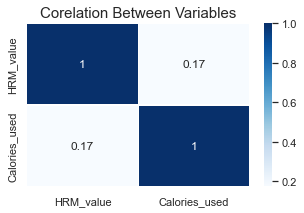

In [51]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (5, 3) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 15)
plt.show()

#### Plotting Calories Used data

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


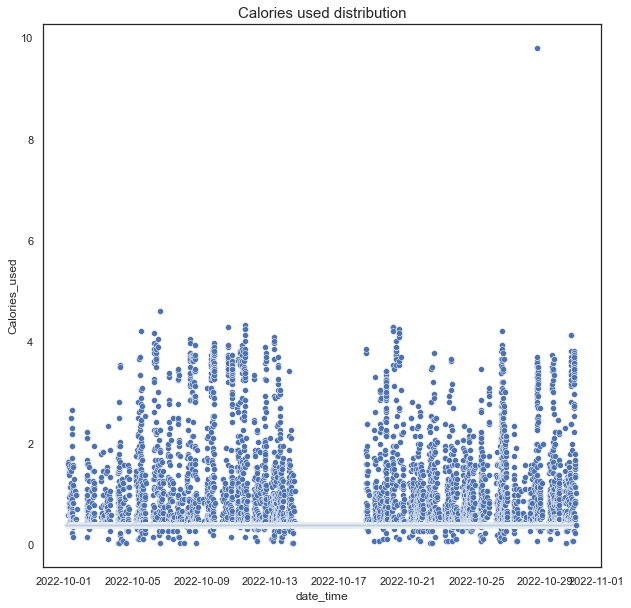

In [52]:
plt.rcParams['figure.figsize'] = (10, 10) 
sns.scatterplot(df["date_time"],df["Calories_used"],data=df)
plt.title('Calories used distribution', fontsize = 15)
plt.show()

#### Plotting HRM data

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='date_time', ylabel='HRM_value'>

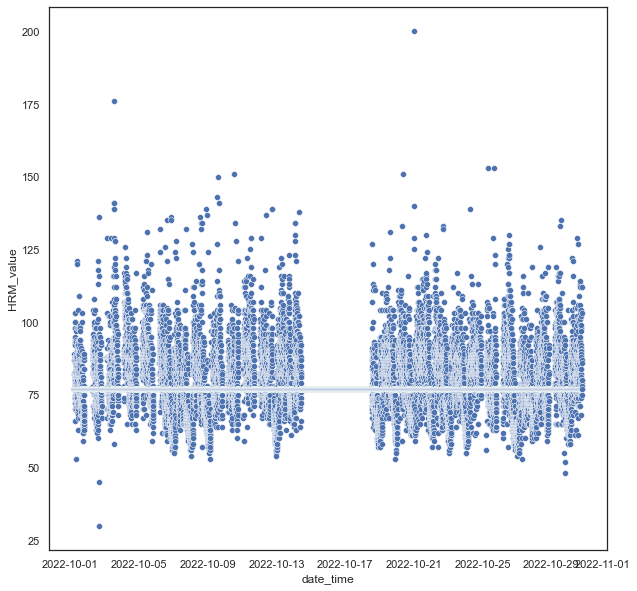

In [53]:
sns.scatterplot(df["date_time"], df["HRM_value"],data=df)

#### Plotting Calories used Vs HRM data

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HRM_value', ylabel='Calories_used'>

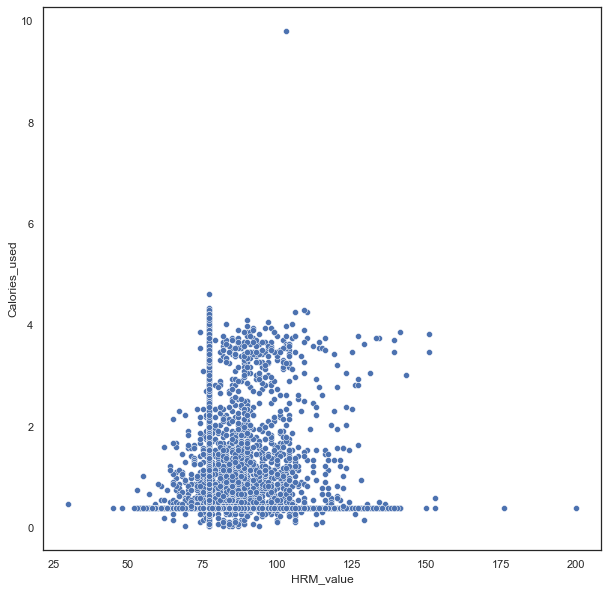

In [54]:
sns.scatterplot(df["HRM_value"],df["Calories_used"],data=df)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HRM_value', ylabel='Density'>

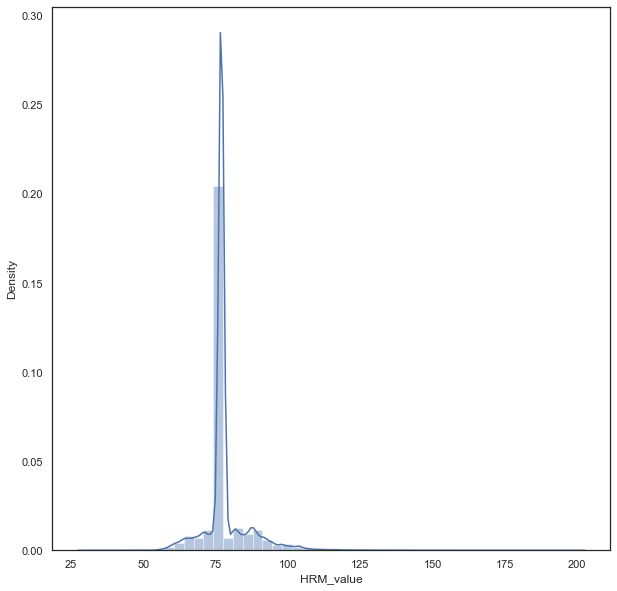

In [55]:
sns.distplot(df["HRM_value"])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calories_used', ylabel='Density'>

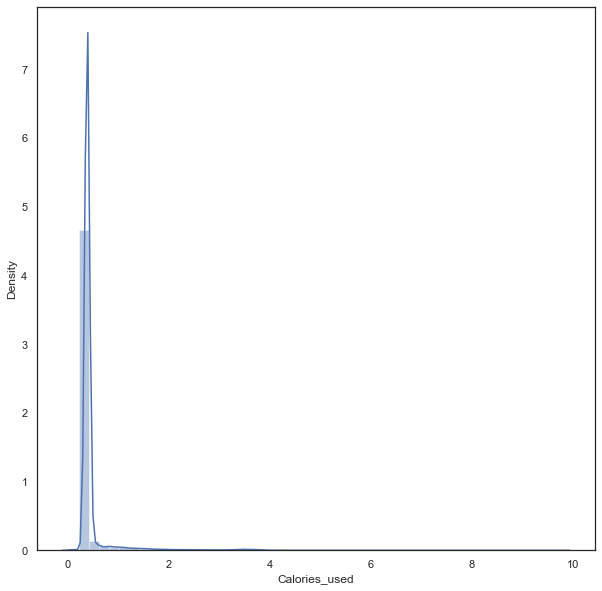

In [56]:
sns.distplot(df["Calories_used"])

<AxesSubplot:xlabel='Calories_used', ylabel='Count'>

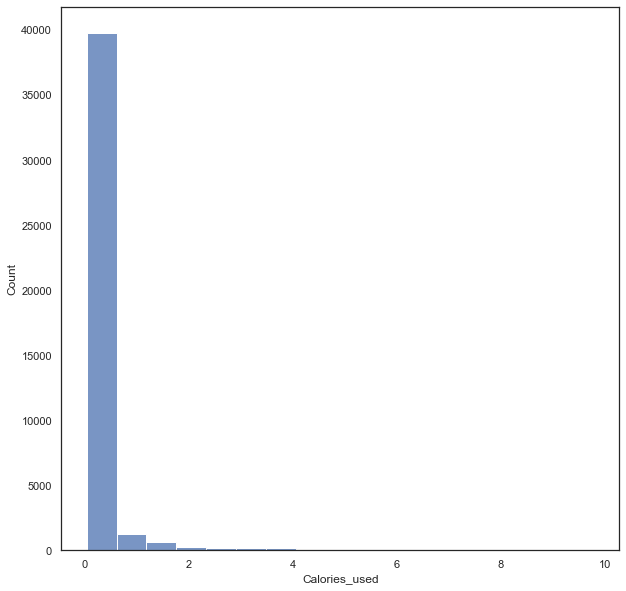

In [57]:
sns.histplot(df["Calories_used"])

### Outlier detetction by 3 Sigma method

In [58]:
df.std()

HRM_value        7.445861
Calories_used    0.391826
dtype: float64

In [59]:
standard_deviations = 3

outliers_hrm = df[((df['HRM_value'] - df['HRM_value'].mean()) / df['HRM_value'].std()).abs() > standard_deviations]

In [60]:
outliers_hrm.shape

(874, 3)

In [61]:
standard_deviations = 3

outliers_calories = df[((df['Calories_used'] - df['Calories_used'].mean()) / df['Calories_used'].std()).abs() > standard_deviations]

In [62]:
outliers_calories.shape

(948, 3)

> ##### HRM has 874 Outliers & Calories Used column has 948 Outliers

> #### Contamination value

In [63]:
df.shape

(42535, 3)

In [64]:
contamination_hrm = outliers_hrm.shape[0]/df.shape[0]

In [65]:
contamination_hrm

0.02054778417773598

In [66]:
contamination_calories = outliers_calories.shape[0]/df.shape[0]

In [67]:
contamination_calories

0.022287527918185022

> #### Contamination by 3 sigma 0.02

In [68]:
df["Calories_used"].describe()

count    42535.000000
mean         0.471639
std          0.391826
min          0.039000
25%          0.390000
50%          0.390000
75%          0.390000
max          9.789000
Name: Calories_used, dtype: float64

In [69]:
df["HRM_value"].describe()

count    42535.000000
mean        78.287562
std          7.445861
min         30.000000
25%         77.000000
50%         77.000000
75%         77.000000
max        200.000000
Name: HRM_value, dtype: float64

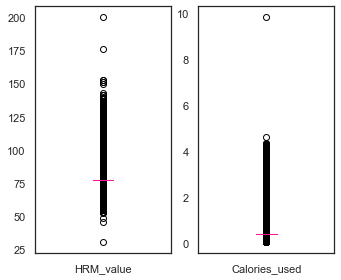

In [70]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

### Outlier detetction using Inter Quartile range (IQR)

In [71]:
# define continuous variable & plot
continous_features = ['HRM_value','Calories_used']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))



In [72]:
outliers(df[continous_features])

For the feature HRM_value, No of Outliers is 13835
For the feature Calories_used, No of Outliers is 4005


> ##### For the feature HRM_value, No_of Outliers is 13835
> ##### For the feature Calories_used, No_of Outliers is 4005

> #### Contamination by IQR

In [73]:
hrm_contamination = 13835/df.shape[0]

In [74]:
hrm_contamination

0.32526154931233103

In [75]:
calories_contamination = 4005/df.shape[0]

In [76]:
calories_contamination

0.09415775243916774

> #### Contaminations from IQR
- ##### HRM is 0.325 
- ##### Calories_used is 0.094



Text(0.5, 1.0, 'hrm value by date')

<Figure size 720x432 with 0 Axes>

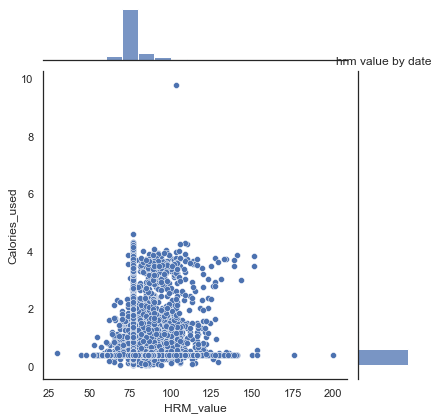

In [77]:
# Here we will visualize our data using the figure() function in the pyplot module of matplotlib's library -- which is used to create a new figure.
plt.figure(figsize=(10,6))

# Seaborn's .jointplot() displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid.
sns.jointplot(x='HRM_value',y='Calories_used',data=df)

# The title() method in matplotlib module is used to specify title of the visualization depicted and displays the title using various attributes.
plt.title('hrm value by date')

In [78]:
# df.loc[:,'lightduty'] = df['lightduty'].apply(lambda x: 0 if x=='No' else 1)
# df['lightduty'].value_counts(0)

In [79]:
# # Let's print the unique values for "month", "day" and "year" in our dataset. 
# print ('Unique values of month:',df.month.unique())
# print ('Unique values of day:',df.day.unique())
# print ('Unique values of year:',df.year.unique())

In [80]:
# # Here we map each temporal variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y- component of that point using the sin and cos trigonometric functions.
# df['day_sin'] = np.sin(df.day*(2.*np.pi/31))
# df['day_cos'] = np.cos(df.day*(2.*np.pi/31))
# df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
# df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

# # Let's drop month, and day
# # TODO 5
# df = df.drop(['month','day','year'], axis=1)

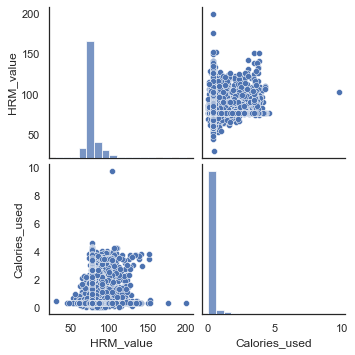

In [81]:
sns.pairplot(df)

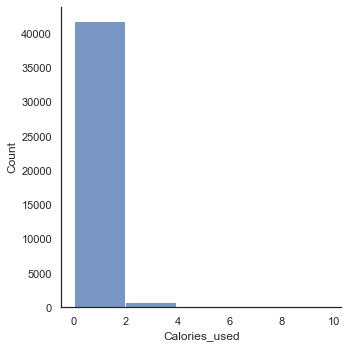

In [82]:
sns.displot(df["Calories_used"],bins=5);

#### Data point beyond 120 in HRM value 

In [83]:
cond_hrm = (df['HRM_value']<50) | (df['HRM_value']>130)

In [84]:
df_hrm_outlier = df.loc[cond_hrm] 

In [85]:
df_hrm_outlier.shape

(44, 3)

In [86]:
# df_hrm_outlier = df[df['HRM_value'] > 120]

In [87]:
df_hrm_outlier.head(10)

,date_time,HRM_value,Calories_used
2031,2022-10-02 15:32:00,30.0,0.468
2065,2022-10-02 16:06:00,45.0,0.390
2068,2022-10-02 16:09:00,136.0,0.390
3291,2022-10-03 12:32:00,176.0,0.390
3327,2022-10-03 13:08:00,139.0,0.390
3341,2022-10-03 13:22:00,141.0,0.390
3343,2022-10-03 13:24:00,139.0,0.390
3347,2022-10-03 13:28:00,141.0,0.390
3349,2022-10-03 13:30:00,141.0,0.390
6072,2022-10-05 10:53:00,131.0,3.042


> #####  people can expect to burn 8–15 calories per minute if doing high intensity interval training (HIIT)

In [88]:
# cond_calories =  (df['Calories_used']<40) | (df['Calories_used']>120)

In [89]:
df_calories_outlier = df[df['Calories_used'] > 4]

In [90]:
df_calories_outlier.head()

,date_time,HRM_value,Calories_used
6105,2022-10-05 11:26:00,77.0,4.212
7212,2022-10-06 05:53:00,77.0,4.173
7499,2022-10-06 10:40:00,77.0,4.056
7665,2022-10-06 13:26:00,77.0,4.602
10182,2022-10-08 07:23:00,97.0,4.056


## Notes

- Clories used are calculated from Steps count
- Assumption: When person's step count is increasing the Calories used also increases.
> - Steps count directly proportional to Calories used

- It is possible to burn calories with moving .i.e. Steps count will not be increased.
> - For persons who are lifting weights and doing some exercises while sitting, Calories used will be more than Steps count.
> - Step count will be very less. 
> - The Heart rate will be more for heavy workouts.


## Model Developement 

> - ### KNN Method


In [154]:
# from sklearn import knn
# from sklearn.neighbors import NearestNeighbors as KNN
from pyod import KNN

ModuleNotFoundError: No module named 'pyod'

In [72]:
# Initiate a KNN model
KNN_model = KNN()

In [91]:
df.columns

Index(['date_time', 'HRM_value', 'Calories_used'], dtype='object')

In [92]:
df_for_out = df[['HRM_value', 'Calories_used']]

In [75]:
# Fit the model to the whole dataset
KNN_model.fit(df_for_out)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [76]:
# Find the labels
outlier_labels = KNN_model.labels_
# Find the number of outliers
number_of_outliers = len(outlier_labels[outlier_labels == 1])
print(number_of_outliers)

AttributeError: 'NearestNeighbors' object has no attribute 'labels_'

In [76]:
type(outlier_labels)

numpy.ndarray

In [77]:
# Finding the outlier passengers
outliers = df.iloc[outlier_labels == 1]

C:\Users\cappaswamy\Anaconda3\envs\Airport_AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HRM_value', ylabel='Calories_used'>

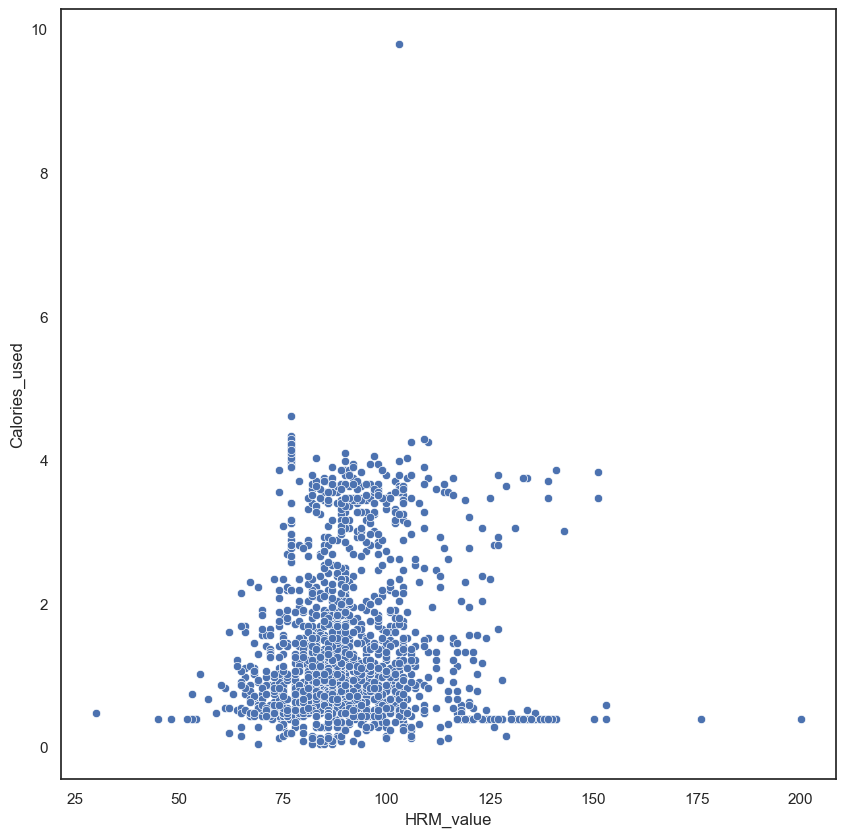

In [78]:
sns.scatterplot(outliers["HRM_value"],outliers["Calories_used"], data=outliers)

> ##### Contamination change from 3 sigma value

In [79]:
# Initiate a KNN model
KNN_model = KNN(contamination=0.02)
# Fit the model to the whole dataset
KNN_model.fit(df_for_out)
# Find the labels
outlier_labels = KNN_model.labels_
# Find the number of outliers
number_of_outliers = len(outlier_labels[outlier_labels == 1])
print(number_of_outliers)

836


In [80]:
# Finding the outlier passengers
outliers = df.iloc[outlier_labels == 1]

In [81]:
outliers.head(10)

,date_time,HRM_value,Calories_used
2,2022-10-01 05:43:00,89.0,1.599
52,2022-10-01 06:33:00,70.0,0.741
60,2022-10-01 06:41:00,93.0,0.819
147,2022-10-01 08:08:00,53.0,0.741
193,2022-10-01 08:54:00,121.0,0.546
195,2022-10-01 08:56:00,76.0,1.014
217,2022-10-01 09:18:00,75.0,1.560
221,2022-10-01 09:22:00,120.0,0.390
231,2022-10-01 09:32:00,72.0,0.858
345,2022-10-01 11:26:00,81.0,2.652


C:\Users\cappaswamy\Anaconda3\envs\Airport_AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HRM_value', ylabel='Calories_used'>

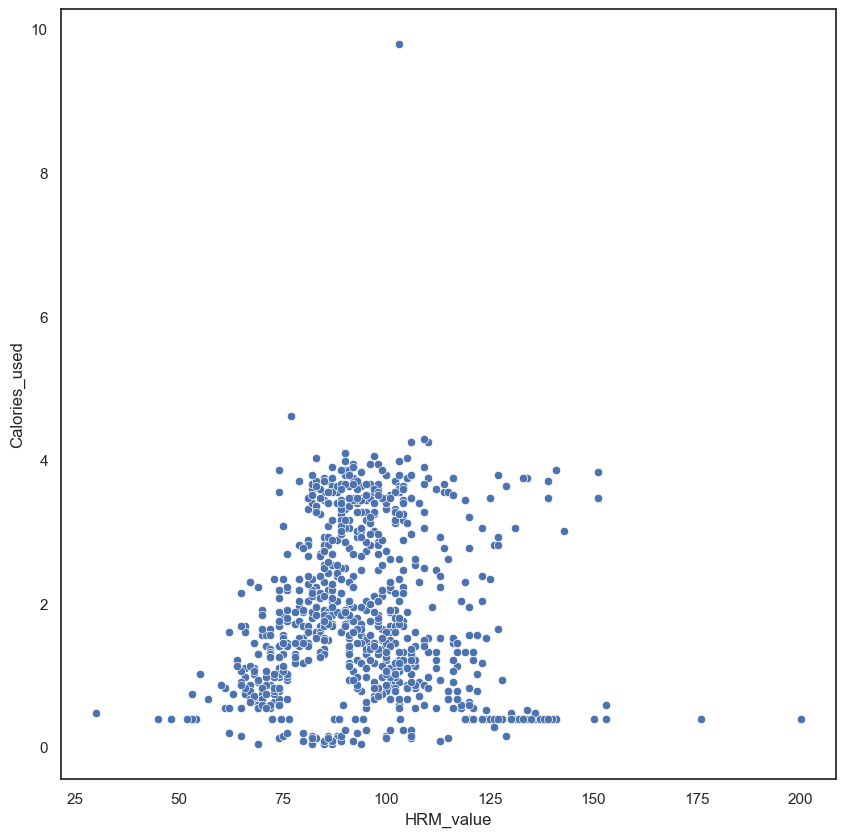

In [82]:
sns.scatterplot(outliers["HRM_value"],outliers["Calories_used"], data=outliers)

> ### Mahalanobis distance method to detect

In [93]:
from sklearn import covariance

In [94]:
df_out_mahalanobis = df_for_out.copy(deep=True)

In [95]:
# Define the Elliptic Envelope
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=0.0075, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
el.fit(df_out_mahalanobis)
# Create column that shows anomaly status
df_out_mahalanobis['Anomaly or Not'] = el.predict(df_out_mahalanobis)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.117452919751862 > -61.255433480384752). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning)


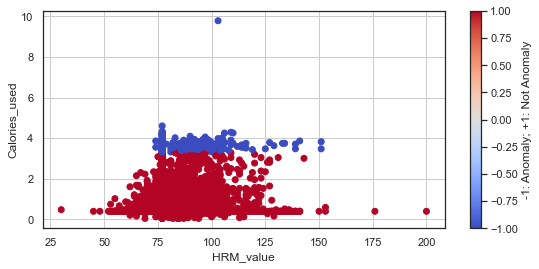

In [96]:
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(df_out_mahalanobis['HRM_value'], df_out_mahalanobis['Calories_used'], c = df_out_mahalanobis['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('HRM_value')
plt.ylabel('Calories_used')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()

#### Contamination = 0.02

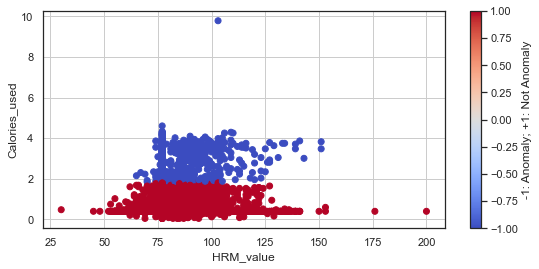

In [97]:
# Define the Elliptic Envelope
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=0.02, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
el.fit(df_out_mahalanobis)
# Create column that shows anomaly status
df_out_mahalanobis['Anomaly or Not'] = el.predict(df_out_mahalanobis)
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(df_out_mahalanobis['HRM_value'], df_out_mahalanobis['Calories_used'], c = df_out_mahalanobis['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('HRM_value')
plt.ylabel('Calories_used')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()


##### Contamination 0.325

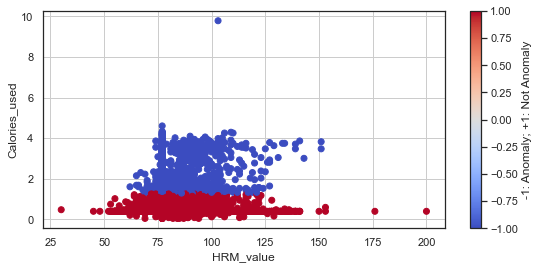

In [98]:
# Define the Elliptic Envelope
el = covariance.EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=0.0325, random_state=0)
# Fit the data - this is where FastMCD is used by sklearn
el.fit(df_out_mahalanobis)
# Create column that shows anomaly status
df_out_mahalanobis['Anomaly or Not'] = el.predict(df_out_mahalanobis)
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (9, 4))
ax = plt.scatter(df_out_mahalanobis['HRM_value'], df_out_mahalanobis['Calories_used'], c = df_out_mahalanobis['Anomaly or Not'], cmap = 'coolwarm')
plt.xlabel('HRM_value')
plt.ylabel('Calories_used')
plt.colorbar(label = '-1: Anomaly; +1: Not Anomaly')
plt.grid()

> ### Isolation Forest

In [99]:
from sklearn import ensemble

In [100]:
df_out_iso = df_for_out.copy(deep=True)

In [101]:
################### Train Isolation Forest #################
model  =  ensemble.IsolationForest(n_estimators=50, max_samples=500, contamination=.022, max_features=2, 
                         bootstrap=False, n_jobs=1, random_state=1, verbose=0, warm_start=False).fit(df_out_iso)
# Get Anomaly Scores and Predictions
anomaly_score = model.decision_function(df_out_iso)
predictions = model.predict(df_out_iso)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


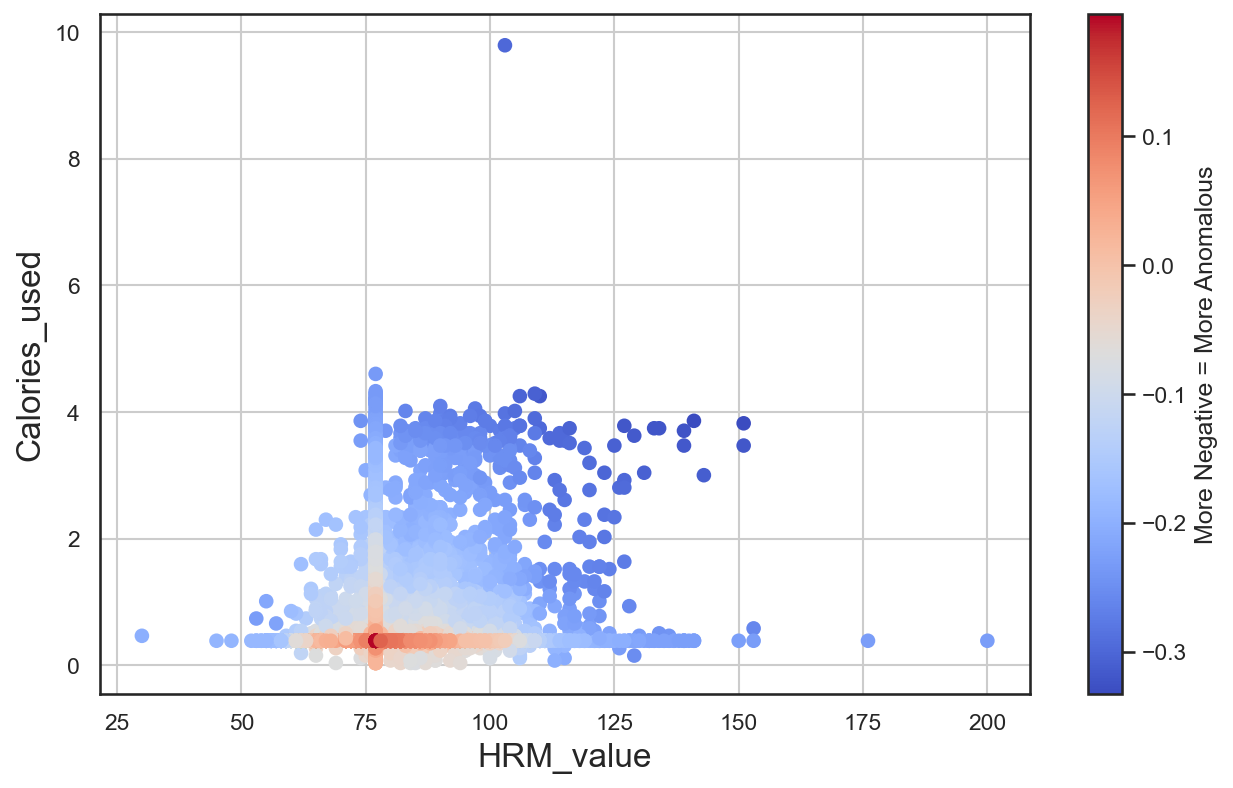

In [102]:
######### Visualize Anomaly scores and Anomaly Status ########
plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(df_out_iso['HRM_value'], df_out_iso['Calories_used'], c = anomaly_score, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('HRM_value', fontsize = 16)
plt.ylabel('Calories_used', fontsize = 16)
plt.grid()

Text(0.5, 1.0, 'Contamination = 0.01')

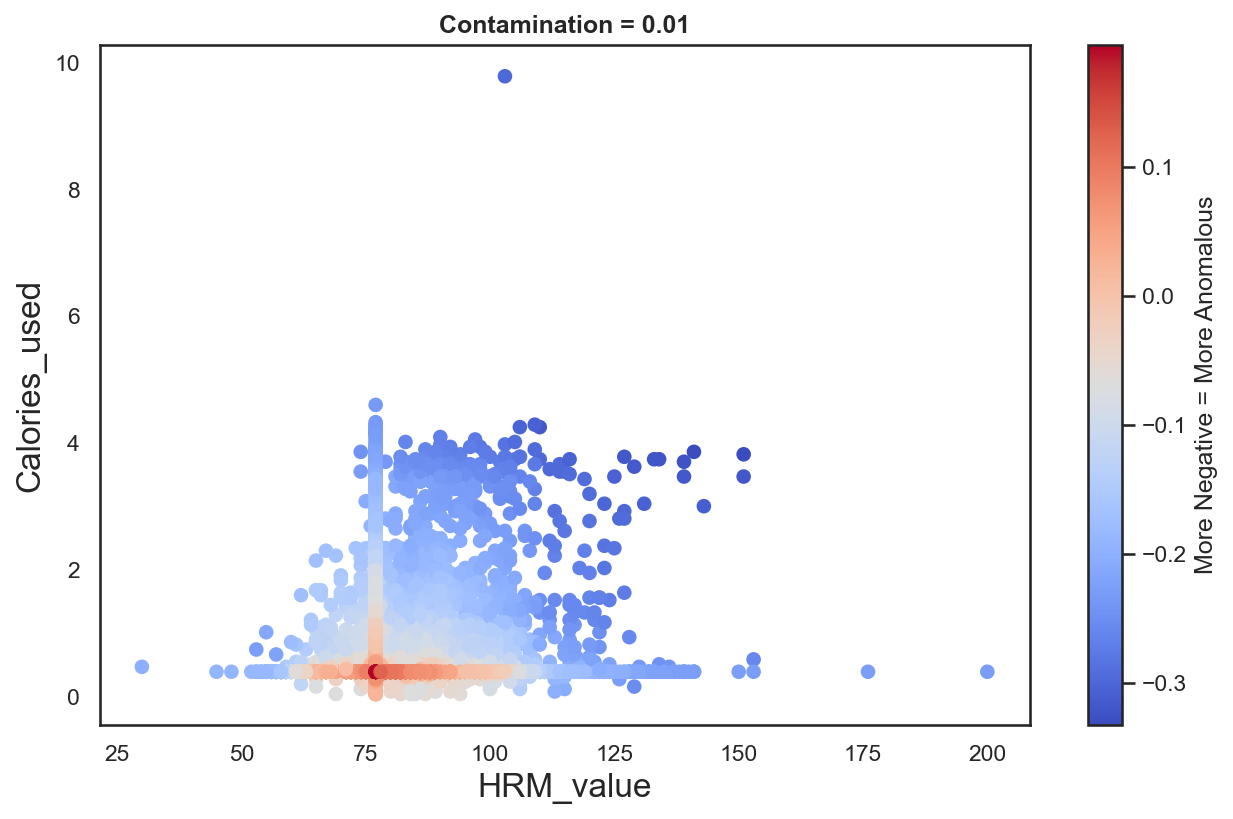

In [103]:

plt.figure(figsize = (10, 6), dpi = 150)
s = plt.scatter(df_out_iso['HRM_value'], df_out_iso['Calories_used'], c = anomaly_score, cmap = 'coolwarm')
plt.colorbar(s, label = 'More Negative = More Anomalous')
plt.xlabel('HRM_value', fontsize = 16)
plt.ylabel('Calories_used', fontsize = 16)
plt.title('Contamination = 0.01', weight = 'bold')

> ### Single class SVM

In [104]:
from sklearn import svm

In [105]:
def plot_anomaly2(data, predicted, ax):
    data2 = data.copy()
    data2['Predicted'] = predicted
    
    normal = data2.loc[data2['Predicted'] == 1, :]
    anomalies = data2.loc[data2['Predicted'] == -1, :]
    
    # Make Scatterplot
    column1 = data.columns[0]
    column2 = data.columns[1]
    
    
    anomalies.plot.scatter(column1, column2, color = 'red', fontsize = 14,  sharex = False, ax=ax)
    normal.plot.scatter(column1, column2, color = 'grey', fontsize = 14,  sharex = False, ax = ax)
#plt.grid(linestyle = '--')
    
    plt.xlabel(column1, fontsize = 14, weight = 'bold')
    plt.ylabel(column2, fontsize = 14, weight = 'bold')
    return ax

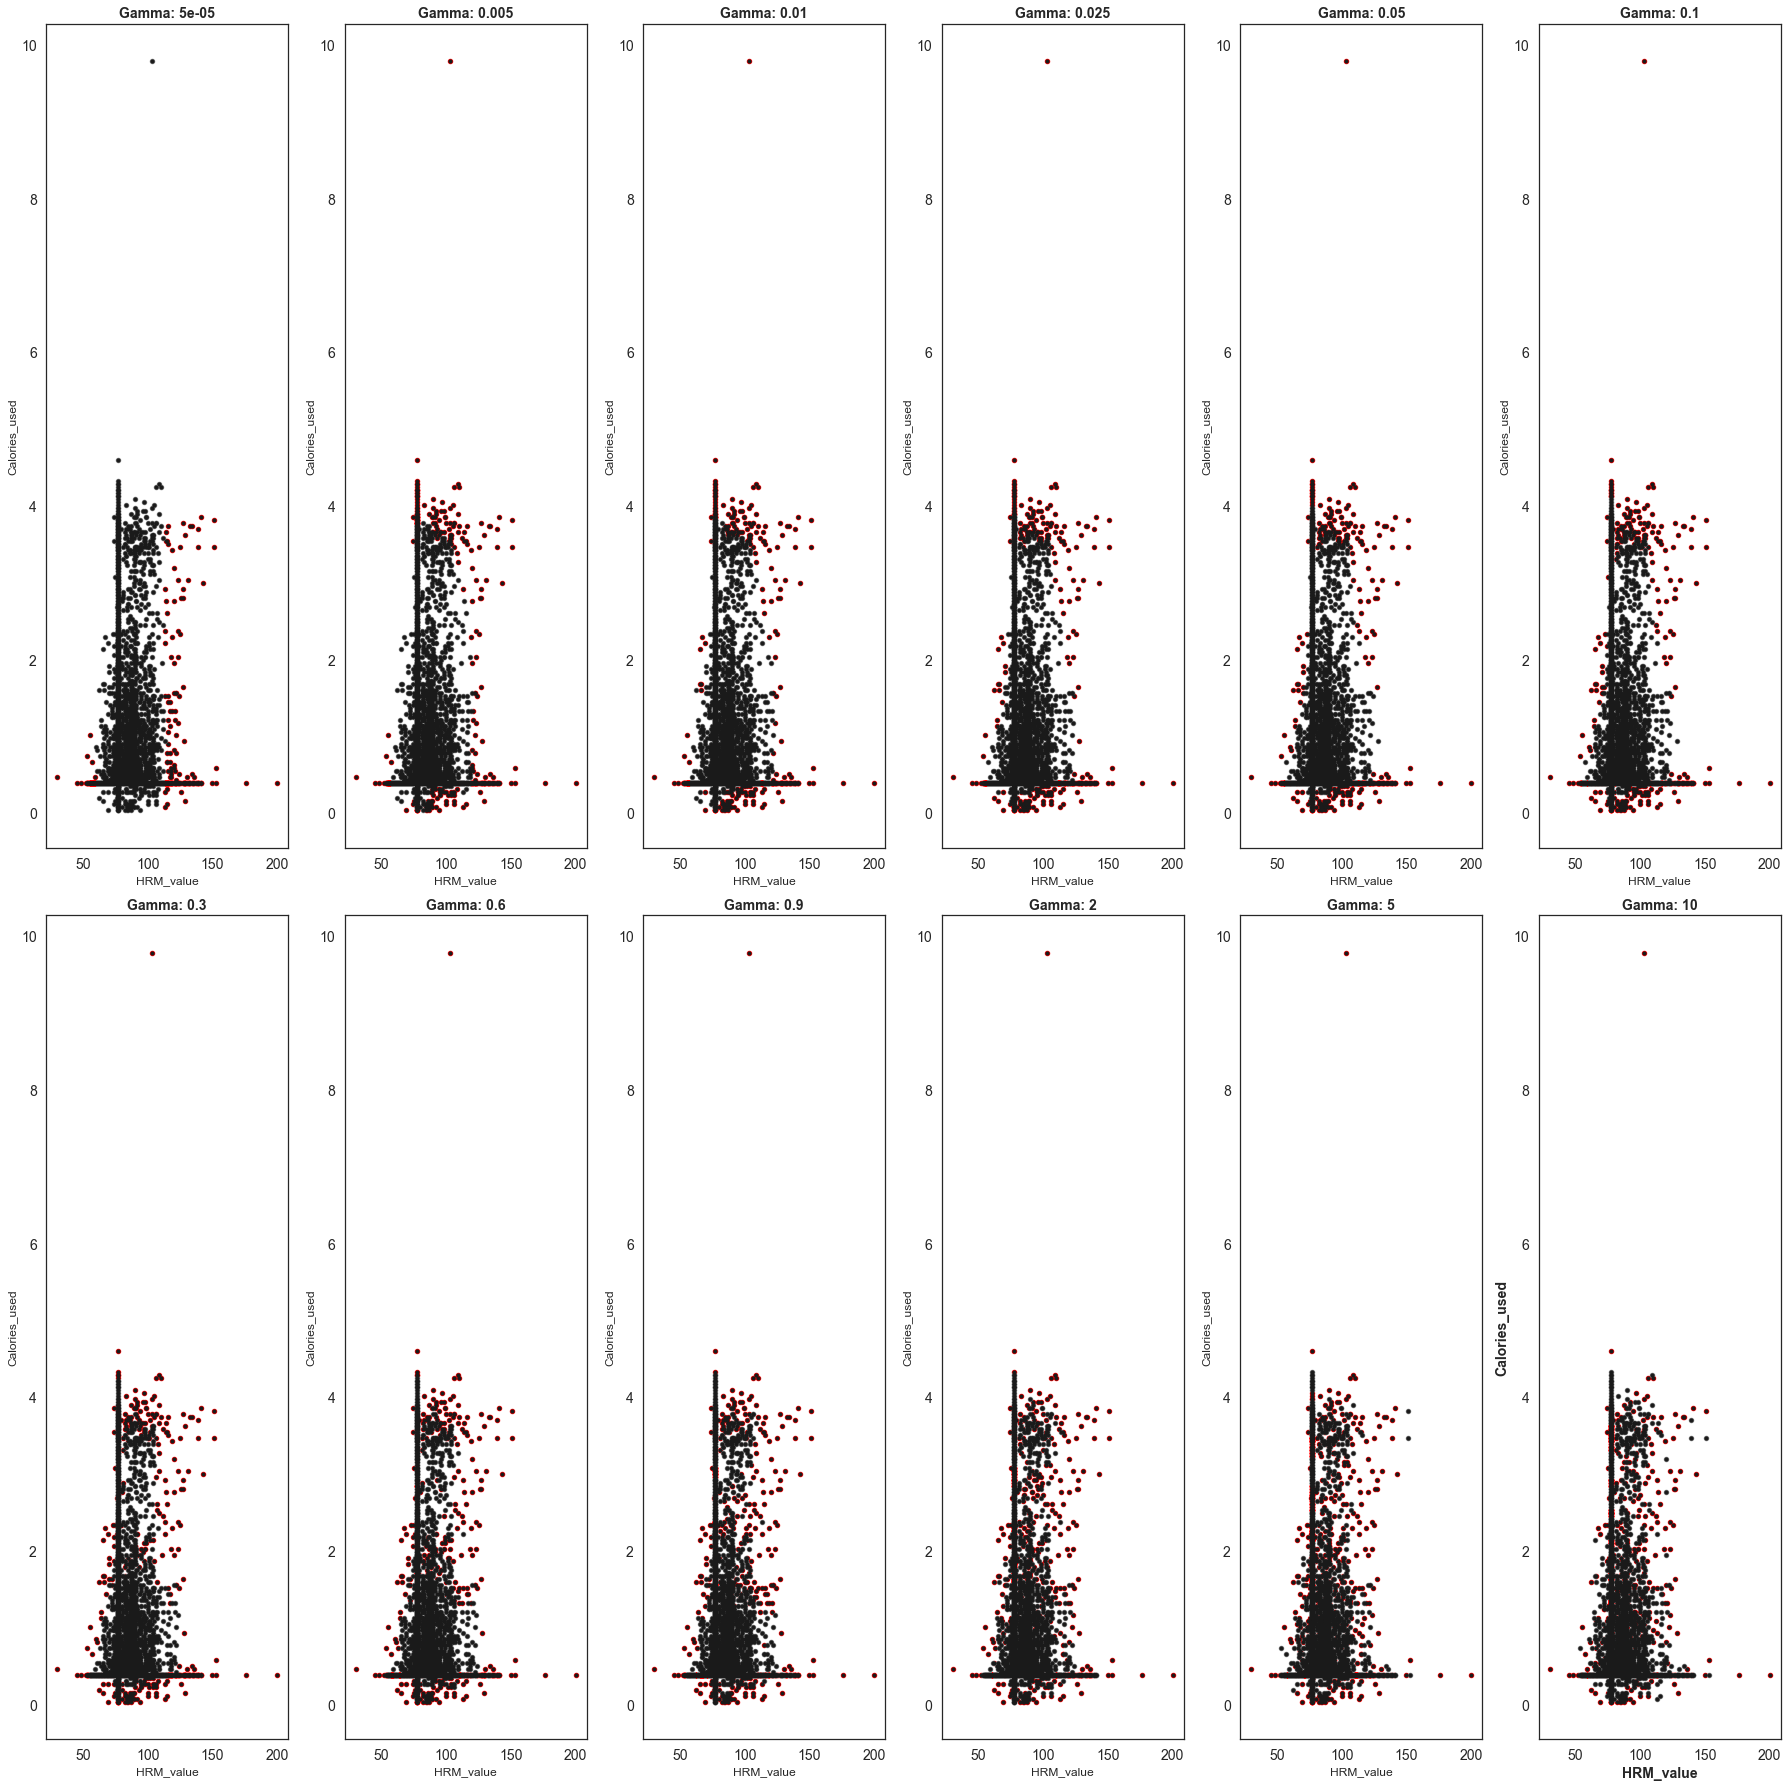

In [106]:

# Create Fake data to classify 
#x_fake  =  pd.DataFrame(np.random.uniform(-5, 19, (35000, 2)), columns = ['Var 1', 'Var 2'])
x_fake = df_for_out.copy(deep=True)
# Visualize effect of changing Gamma
gammas = [.00005, .005, .01, .025, .05, .1,.3, .6, .9, 2, 5, 10]
fig, axes = plt.subplots(2, 6, figsize = (25, 25), tight_layout = True)
for i, ax in zip(range(len(gammas)), axes.flatten()):
    gamma = gammas[i]
    model = svm.OneClassSVM(kernel='rbf', degree=5, gamma=gamma, coef0=0.0, tol=0.001, nu=0.01, 
                        shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(df_for_out)
    model_predictions = model.predict(x_fake)
    #x_fake['Predictions'] = model_predictions
    ax = plot_anomaly2(x_fake, model_predictions,ax)
    ax.scatter(df_for_out.iloc[:, 0], df_for_out.iloc[:, 1], color = 'k', s = 10)
    ax.set_title('Gamma: {}'.format(np.around(gamma,6)), weight = 'bold', fontsize = 14)

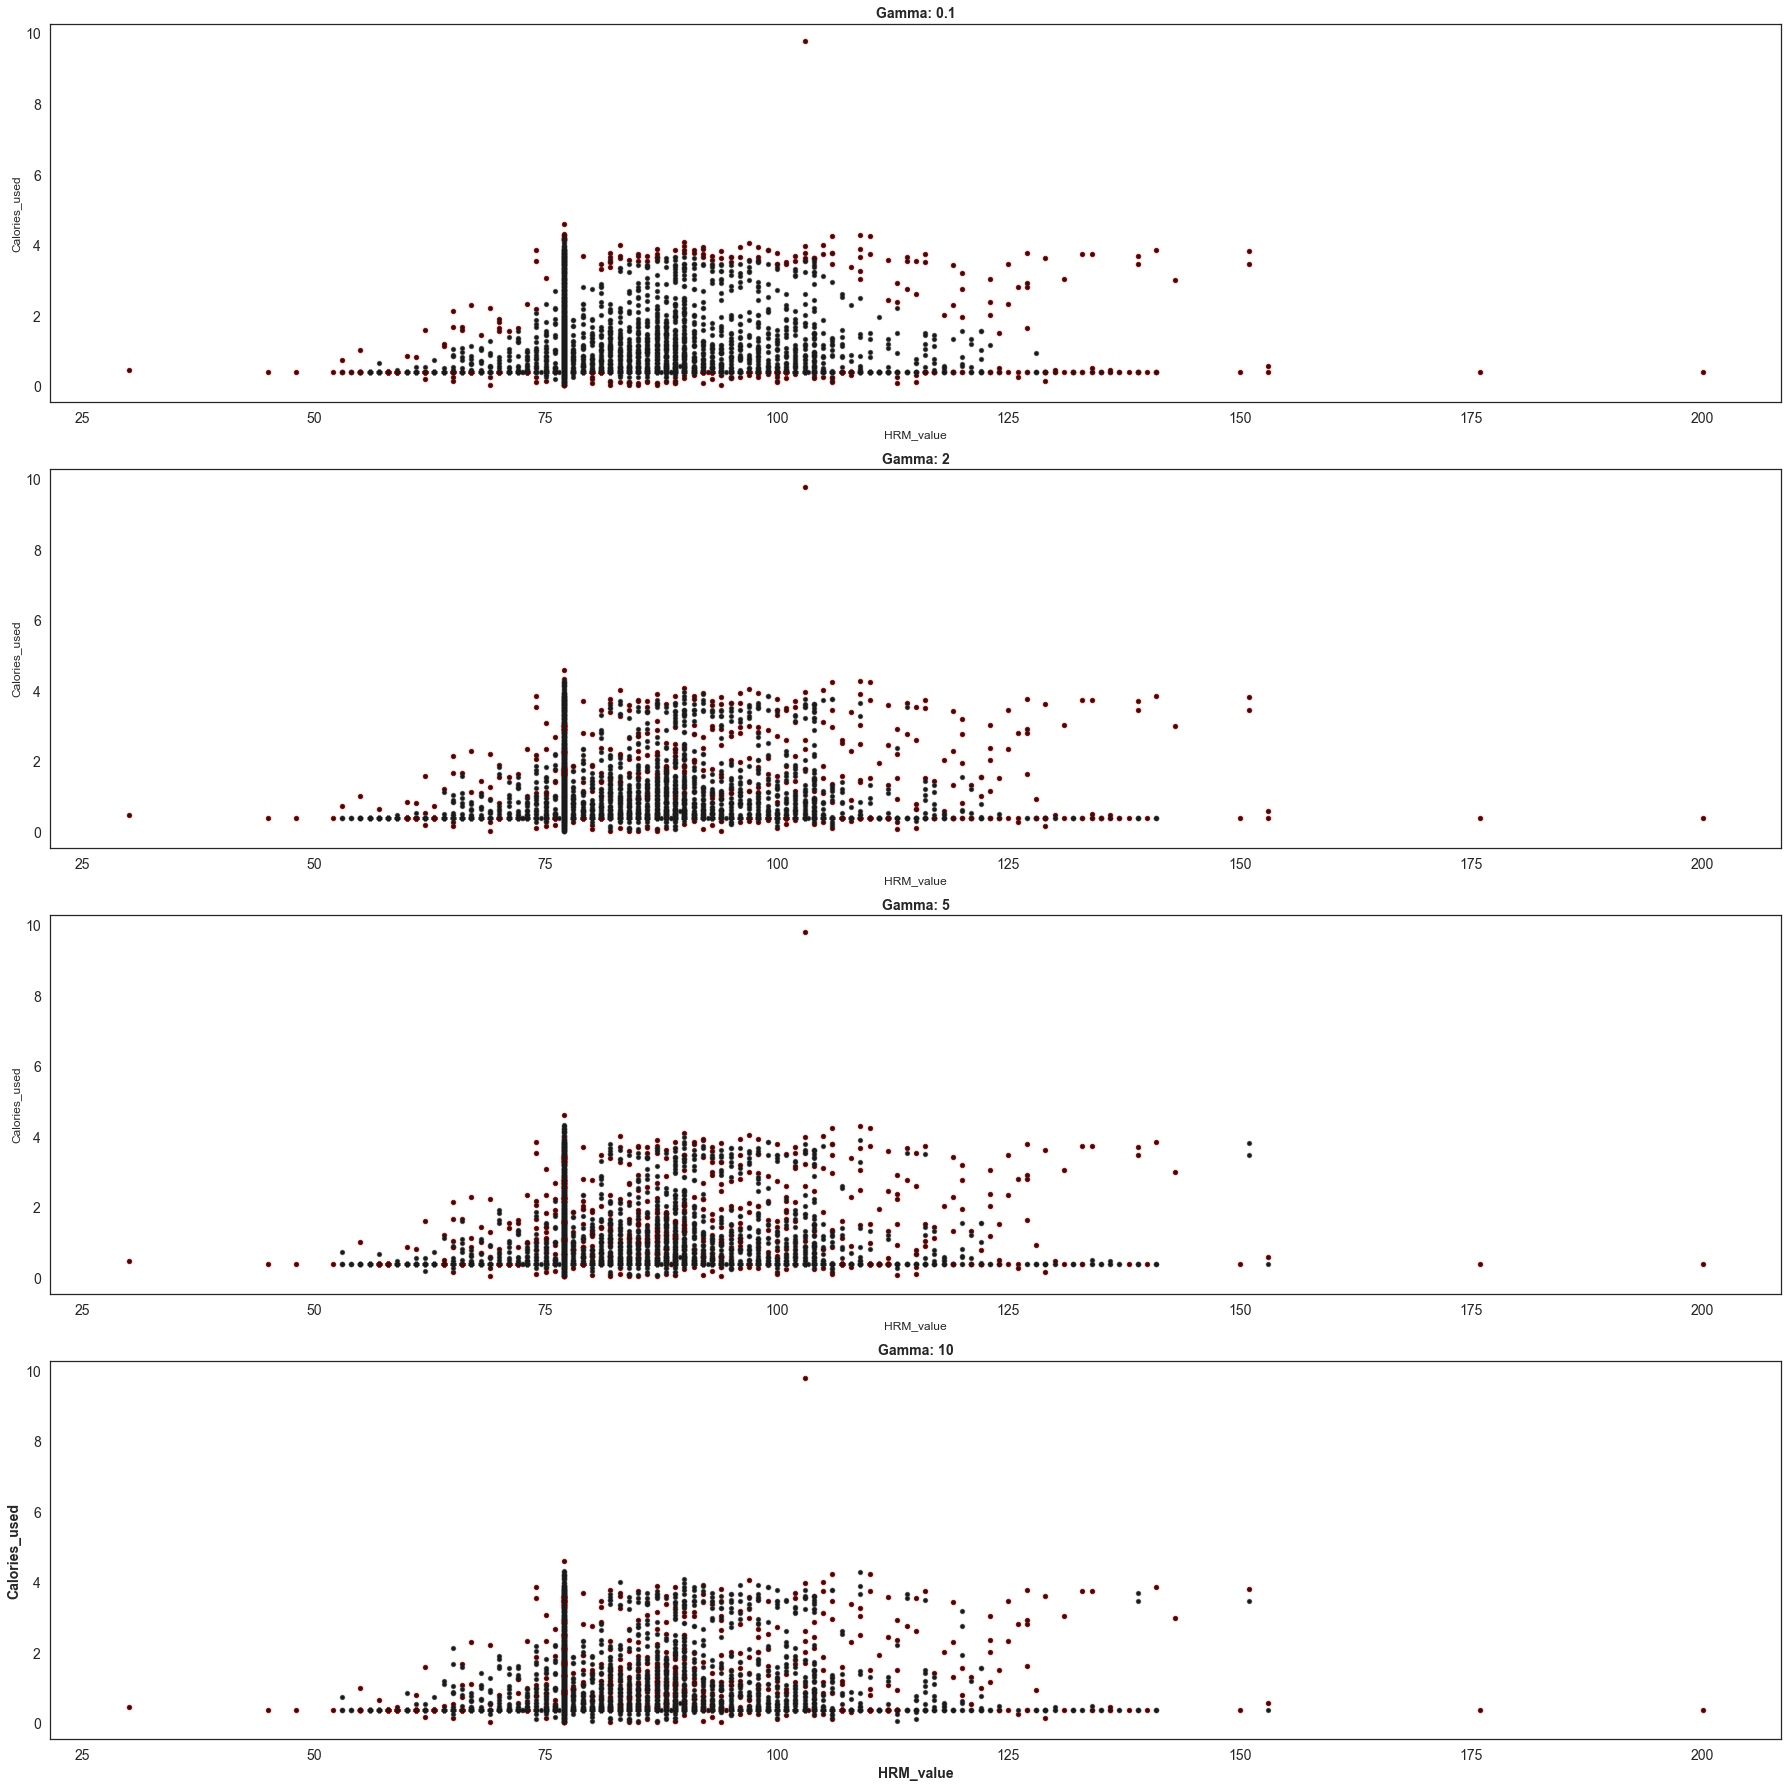

In [111]:

# Create Fake data to classify 
#x_fake  =  pd.DataFrame(np.random.uniform(-5, 19, (35000, 2)), columns = ['Var 1', 'Var 2'])
x_fake = df_for_out.copy(deep=True)
# Visualize effect of changing Gamma
gammas = [.1, 2, 5, 10]
fig, axes = plt.subplots(4, 1, figsize = (25, 25), tight_layout = True)
for i, ax in zip(range(len(gammas)), axes.flatten()):
    gamma = gammas[i]
    model = svm.OneClassSVM(kernel='rbf', degree=5, gamma=gamma, coef0=0.0, tol=0.001, nu=0.01, 
                        shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(x_fake)
    model_predictions = model.predict(x_fake)
    #x_fake['Predictions'] = model_predictions
    ax = plot_anomaly2(x_fake, model_predictions,ax)
    ax.scatter(df_for_out.iloc[:, 0], df_for_out.iloc[:, 1], color = 'k', s = 10)
    ax.set_title('Gamma: {}'.format(np.around(gamma,6)), weight = 'bold', fontsize = 14)

In [110]:
set(model_predictions)

{-1, 1}

In [108]:
model = svm.OneClassSVM(kernel='rbf', degree=5, gamma=0.1, coef0=0.0, tol=0.001, nu=0.01, 
                    shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(x_fake)
model_predictions = model.predict(x_fake)
ax = x_data.plot(kind="scatter", x="HRM_value",y="Calories_used", color="b", label="Original")
anomalies.plot(x="HRM_value",y="Calories_used", color="r", label="Anomalies", ax=ax,kind="scatter")
normal.plot( x="HRM_value",y="Calories_used", color="g", label="Normal", ax=ax,kind="scatter")
plt.show()

NameError: name 'x_data' is not defined

In [170]:
model.predict([["100", "2"]])

C:\Users\cappaswamy\Anaconda3\envs\Airport_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [174]:
import os

In [175]:
os.listdir()

['.ipynb_checkpoints',
 '1Min_EDA_heart_rate.ipynb',
 'args_tests.py',
 'calories_Calculated_for_oct_Data.csv',
 'data_combine_hcs_subhas.ipynb',
 'Data_resampled_and_filled_HRM.csv',
 'Data_resampled_and_filled_stepcount.csv',
 'hcs_subhash_heartrates.csv',
 'Heart_rate_anomaly_EDA-1Min_data.ipynb',
 'Heart_rate_anomaly_EDA.ipynb',
 'one_class_model.sav',
 'try_individual_resampling.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb']

In [176]:
os.getcwd()

'C:\\Users\\cappaswamy\\Documents\\Dev\\Wearable_AI\\Heart_anomaly_detection\\Heart_anomaly_detection\\raw_files\\Pre-Process'

In [ ]:
Documents/Dev/Wearable_AI/Heart_anomaly_detection/Heart_anomaly_detection/Models

In [177]:
# save the model to disk
filename = './Models/one_class_model.sav'
joblib.dump(model, filename)

['./Models/one_class_model.sav']

In [178]:
# load the model from disk
loaded_model = joblib.load(filename)

In [179]:
loaded_model.predict([["100", "1"]])

C:\Users\cappaswamy\Anaconda3\envs\Airport_AI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

> ####  1 --> Normal 
> #### -1 --> Anomaly

In [158]:
model = svm.OneClassSVM(kernel='rbf', degree=5, gamma=.0005, coef0=0.0, tol=0.001, nu=0.01, 
                    shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(x_scaled)
model_predictions = model.predict(x_scaled)

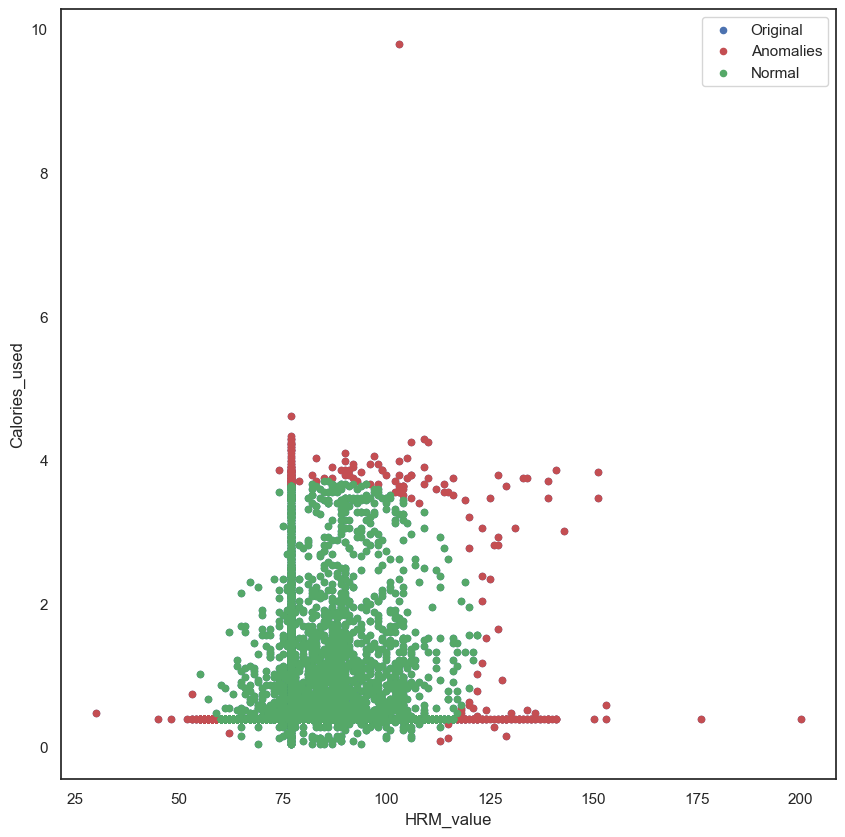

In [159]:
ax = x_data.plot(kind="scatter", x="HRM_value",y="Calories_used", color="b", label="Original")
anomalies.plot(x="HRM_value",y="Calories_used", color="r", label="Anomalies", ax=ax,kind="scatter")
normal.plot( x="HRM_value",y="Calories_used", color="g", label="Normal", ax=ax,kind="scatter")
plt.show()


In [163]:
model.predict([["90", "2"]])

array([-1], dtype=int64)

In [180]:
normal.head(10)

,HRM_value,Calories_used,Predicted
0,82.0,1.638,1
1,77.0,0.390,1
2,89.0,1.599,1
3,77.0,0.390,1
4,87.0,0.390,1
5,77.0,0.390,1
6,88.0,0.585,1
7,77.0,0.390,1
8,82.0,0.390,1
9,77.0,0.390,1


In [124]:
model = svm.OneClassSVM(kernel='rbf', degree=5, gamma=.01, coef0=0.0, tol=0.001, nu=0.01, 
                    shrinking=True, cache_size=200, verbose=False, max_iter=- 1).fit(x_scaled)
model_predictions = model.predict(x_scaled)
#x_fake['Predictions'] = model_predictions


##### 1 is normal, -1 is Anomaly

In [125]:
model_predictions[5]

1

In [121]:
model_predictions

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [122]:
type(model_predictions)

numpy.ndarray

In [84]:
x_data["Predicted"] = model_predictions

NameError: name 'x_data' is not defined

In [127]:
x_data.head(10)

,HRM_value,Calories_used,Predicted
0,82.0,1.638,1
1,77.0,0.390,1
2,89.0,1.599,1
3,77.0,0.390,1
4,87.0,0.390,1
5,77.0,0.390,1
6,88.0,0.585,1
7,77.0,0.390,1
8,82.0,0.390,1
9,77.0,0.390,1


In [83]:
normal = x_data.loc[x_data['Predicted'] == 1, :]
anomalies = x_data.loc[x_data['Predicted'] == -1, :]


NameError: name 'x_data' is not defined

In [133]:
normal.head(10)

,HRM_value,Calories_used,Predicted
0,82.0,1.638,1
1,77.0,0.390,1
2,89.0,1.599,1
3,77.0,0.390,1
4,87.0,0.390,1
5,77.0,0.390,1
6,88.0,0.585,1
7,77.0,0.390,1
8,82.0,0.390,1
9,77.0,0.390,1


In [134]:
anomalies.head(10)

,HRM_value,Calories_used,Predicted
147,53.0,0.741,-1
193,121.0,0.546,-1
221,120.0,0.390,-1
748,59.0,0.390,-1
1964,118.0,0.390,-1
1966,121.0,0.390,-1
2031,30.0,0.468,-1
2065,45.0,0.390,-1
2068,136.0,0.390,-1
2756,129.0,0.390,-1


In [82]:
ax = x_data.plot(kind="scatter", x="HRM_value",y="Calories_used", color="b", label="Original")
anomalies.plot(x="HRM_value",y="Calories_used", color="r", label="Anomalies", ax=ax,kind="scatter")
normal.plot( x="HRM_value",y="Calories_used", color="g", label="Normal", ax=ax,kind="scatter")
plt.show()


NameError: name 'x_data' is not defined

In [142]:
import joblib

In [143]:
# save the model to disk
filename = 'one_class_model.sav'
joblib.dump(model, filename)
 

['one_class_model.sav']

In [144]:
# load the model from disk
loaded_model = joblib.load(filename)

In [146]:

loaded_model.get_params()

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 5,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.01,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [157]:
loaded_model.predict([["100", "1"]])

array([-1], dtype=int64)

> ### AutoEncoder

In [100]:
import datetime as dt

> ##### Plotting 1 day data

In [101]:
df_auto_enc = df.copy(deep=True)

In [102]:
df_auto_enc["date"] = df_auto_enc["date_time"].dt.date

In [103]:
df_auto_enc["date"].head(10)

0    2022-10-01
1    2022-10-01
2    2022-10-01
3    2022-10-01
4    2022-10-01
5    2022-10-01
6    2022-10-01
7    2022-10-01
8    2022-10-01
9    2022-10-01
Name: date, dtype: object

In [104]:
df_auto_enc.dtypes

date_time        datetime64[ns]
HRM_value               float64
Calories_used           float64
date                     object
dtype: object

In [105]:
df_auto_enc.head(10)

,date_time,HRM_value,Calories_used,date
0,2022-10-01 05:41:00,82.0,1.638,2022-10-01
1,2022-10-01 05:42:00,77.0,0.390,2022-10-01
2,2022-10-01 05:43:00,89.0,1.599,2022-10-01
3,2022-10-01 05:44:00,77.0,0.390,2022-10-01
4,2022-10-01 05:45:00,87.0,0.390,2022-10-01
5,2022-10-01 05:46:00,77.0,0.390,2022-10-01
6,2022-10-01 05:47:00,88.0,0.585,2022-10-01
7,2022-10-01 05:48:00,77.0,0.390,2022-10-01
8,2022-10-01 05:49:00,82.0,0.390,2022-10-01
9,2022-10-01 05:50:00,77.0,0.390,2022-10-01


In [106]:
mask = (df_auto_enc['date'] == '2022-10-11')
df_1day = df_auto_enc.loc[mask]

In [107]:
df_1day.head(10)

,date_time,HRM_value,Calories_used,date


In [108]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Scale the data
scaler = MinMaxScaler()
scaler = scaler.fit(df)
scale_train = pd.DataFrame(scaler.transform(df))
scale_test = pd.DataFrame(scaler.transform(df_test))

In [ ]:
#model building
model = keras.Sequential()
model.add(keras.layers.LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, name='encoder_1'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.LSTM(128, return_sequences=True, name='encoder_2'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.LSTM(64, return_sequences=False, name='encoder_3'))
model.add(keras.layers.RepeatVector(n=X_train.shape[1], name='encoder_decoder'))
model.add(keras.layers.LSTM(64, return_sequences=True, name='decoder_1'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.LSTM(128, return_sequences=True, name='decoder_2'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.LSTM(256, return_sequences=True, name='decoder_3'))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')
model.summary()

In [ ]:
#fitting on training data
history = model.fit(X_train, X_train, epochs=25, batch_size=256,
validation_split=0.1,verbose=1,shuffle=False)
#plotting loss
fig=plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('No. Epochs')
plt.legend()
plt.show()

In [ ]:
#predicting on test data
X_pred = model.predict(X_train)
X_pred_2d = pd.DataFrame(X_pred[:,0,:]).astype(float)
X_pred_2d.columns = ['HR Pred', 'Calories Pred']
X_train_2d = pd.DataFrame(X_train[:,0,:]).astype(float)
X_train_2d.columns = ['HR Test', 'Calories Test']
#Plot the test data together
fig, axs = plt.subplots(4, figsize=(12,6))
axs[0].plot(X_pred_2d['HR Pred'])
axs[1].plot(X_train_2d['HR Test'])
axs[2].plot(X_pred_2d['Calories Pred'])
axs[3].plot(X_train_2d['Calories Test'])
plt.setp(axs[0].get_xticklabels(), visible=False)
plt.setp(axs[1].get_xticklabels(), visible=False)
plt.setp(axs[2].get_xticklabels(), visible=False)
axs[0].tick_params(axis='x', rotation=70)
axs[1].tick_params(axis='x', rotation=70)
axs[0].set(ylabel= 'HR Prediction')
axs[1].set(ylabel= 'HR Training')
axs[2].set(ylabel= 'Calories Prediction')
axs[3].set(ylabel= 'Calories Training', xlabel= 'Time Step (per minute)')
plt.tight_layout()

In [ ]:
#calculate error
predictions = pd.concat([X_pred_2d['HR Pred'], X_pred_2d['Calories Pred']], axis = 1)
train_inputs = pd.concat([X_train_2d['HR Test'], X_train_2d['Calories Test']], axis = 1)anomaly = pd.DataFrame(np.abs(predictions.values - train_inputs.values))
anomaly = anomaly.mean(axis=1)
ax = sns.distplot(anomaly, bins=50, kde = True)
ax.set_title('Training Data Loss Distribution')
ax.set_xlabel('Loss')
ax.set_ylabel('Frequency')
fig = ax.get_figure()

In [ ]:
#Predicting
X_pred = model.predict(X_test)
X_pred = pd.DataFrame(X_pred[:,0,:]).astype(float)
X_pred.columns = ['HR Pred', 'Calories Pred']
X_test_data = pd.DataFrame(X_test[:,0,:]).astype(float)
X_test_data.columns = ['HR Test', 'Calories Test']

In [ ]:
difference = pd.DataFrame(np.abs(X_pred.values - X_test_data.values))
difference['mae loss'] = difference.mean(axis=1)
difference['threshold'] = thres
difference['anomaly'] = difference['mae loss'] > difference['threshold']
difference['index'] = difference.index
X_pred['index'] = X_pred.index
X_test_data['index'] = X_test_data.index
X_test_data = X_test_data.join(difference['anomaly'])

In [ ]:
X_test_data_original = pd.DataFrame(scaler.inverse_transform(X_test_data[['HR Test','Calories Test']]))
X_test_data = pd.concat([X_test_data, X_test_data_original], axis = 1)
X_test_data.columns = ['HR Test', 'Calories Test', 'Index', 'Anomaly', 'Heart Rate (BPM)', 'Calories Used']

In [ ]:
plt = sns.lmplot(x='index', y='mae loss', data=difference,
fit_reg=False, hue='anomaly', scatter_kws={"s": 10}, legend=True, legend_out=False, height=5, aspect=2)
plt.set(xlabel='Time Steps (per minute)', ylabel='MAE Loss')

In [ ]:
plt = sns.lmplot(x ='Index', y='Heart Rate (BPM)', scatter_kws={"s": 10}, data=X_test_data,
fit_reg=False, hue='Anomaly', legend=True, legend_out=False, height=5, aspect=2)
plt.set(xlabel='Time Steps (per minute)', ylabel='Heart Rate (BPM)')

In [ ]:
plt = sns.lmplot(x ='Index', y='Calories Used', scatter_kws={"s": 10}, data=X_test_data,
fit_reg=False, hue='Anomaly', legend=True, legend_out=False, height=5, aspect=2)
plt.set(xlabel='Time Steps (per minute)', ylabel='Calories Used')